In [1]:
# Importing required packages

import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
# Loading the data

raw_wine = pd.read_csv("wine.csv")

raw_wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# View the data
raw_wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# Checking for any null values
# there are no null values

raw_wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
# Considering only numerical data for PCA 

wine_clear = raw_wine.iloc[:,1:]
wine_clear.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Converting into numpy array for PCA 

wine = wine_clear.values
wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Normalizing the numerical data 

wine_cured = scale(wine)

In [8]:
wine_cured

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
# assigning the PCA and fitting the data with all components

pca = PCA()
pca_wine_values = pca.fit_transform(wine_cured)

In [10]:
pca_wine_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [12]:
# Fitting the data and taking only 3 principle components

pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_cured)

In [13]:
# Finding out the amount of variance that each PCA explains 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [14]:
# Cumulative variance  calculation and rounding and converting to percentage

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

In [23]:
# viewing all principle components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

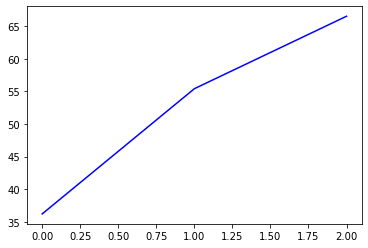

In [22]:
# plotting of cumulative Variance  along PCA components 
# the first three PCs are explaining about 65% of the data or information
plt.plot(var1,color="blue")


In [32]:
# adding Pcs to the type from the raw data 
wine_rack = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), raw_wine[['Type']]], axis = 1)

In [33]:
wine_rack.head()

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

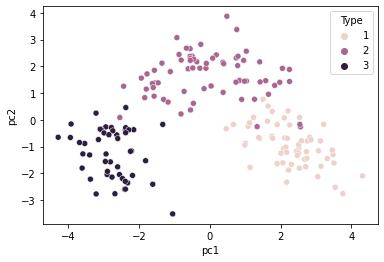

In [34]:
# viwing the data pc1 vs pc2
import seaborn as sns
sns.scatterplot(data=wine_rack,x='pc1',y='pc2', hue='Type')

<AxesSubplot:xlabel='pc3', ylabel='pc2'>

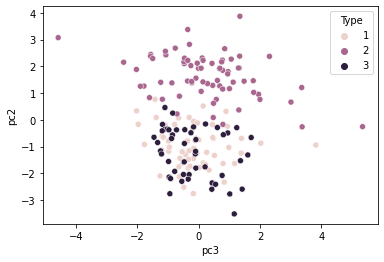

In [35]:
# viwing the data pc3 vs pc2

sns.scatterplot(data=wine_rack,x='pc3',y='pc2', hue='Type')

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

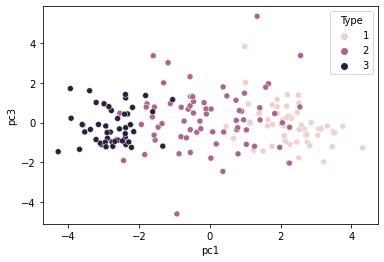

In [37]:
# viewing the data pc1 vs pc3

sns.scatterplot(data=wine_rack,x='pc1',y='pc3', hue='Type')

# Applying Clustering Technincs

In [38]:
# importing libraries

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [39]:
# reading the data to dataframe df

df = wine_rack.copy()

In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
# Normalization function before applying clustering technics

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [42]:
df2 = norm_func(df)

In [43]:
type(df2)

pandas.core.frame.DataFrame

In [44]:
#Checking for best clusters numbers in Kmeans clustering

l=[]
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i) 
    model_kmeans.fit(df2)
    l.append(model_kmeans.inertia_)

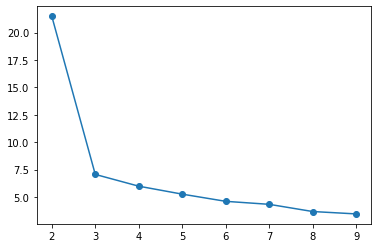

In [45]:
# plotting the inertia data with number of clusters

plt.scatter(list(range(2,10)),l)
plt.plot(list(range(2,10)),l)


In [46]:
# From the graph it is evident that the inrtia i=has major drop at 3
# so we can consider 3 as number of clusters
# it is also coinciding with original classification

In [47]:
# Clustering using K means method with n = 3

model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(df2)

KMeans(n_clusters=3)

In [48]:
# predicting the clusters
model_kmeans.fit_predict(df2)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [49]:
# Checking with inertai. it has dropped from arounf 20 to 7 for n = 2 to 3
# # so it is a good number for clustering

model_kmeans.inertia_

7.059592564921757

In [50]:
# storing the data into data frame

wine_label= pd.DataFrame(model_kmeans.fit_predict(df2))

In [51]:
wine_stored= wine_rack.copy()

In [53]:
# combining cluster labels with original data labels

wine_stored['label'] = wine_label

In [54]:
# Vewing the PCsand labels from predicted values and original(Type)
wine_stored.head(5)

,pc1,pc2,pc3,Type,label
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0


In [55]:
# Grouping them so that it will be easy for checking

wine_stored_drum = wine_stored.groupby(['Type', 'label']).agg(['mean']).reset_index()
wine_stored_drum

,Type,label,pc1,pc2,pc3
,,,mean,mean,mean
0,1,0,2.282739,-0.967874,-0.159555
1,2,1,-0.038986,1.643483,0.261592
2,3,2,-2.748200,-1.241308,-0.190818


In [ ]:
# as we can see there are crossing of data from Type column and label column 
# which indicates all the original data labels and clusters created have same association within the clusters
# hence it is agood model

# Culstering using Hierarchical Model

In [56]:
# we have already imported the required modules
# also we are using the df2 data from the above

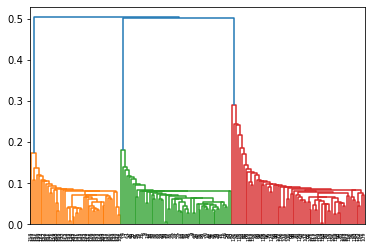

In [57]:
# create dendrogram using sinlge linkage method 

dendrogram = sch.dendrogram(sch.linkage(df2, method='single'))

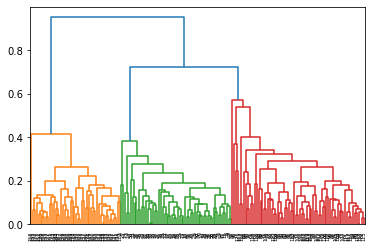

In [58]:
# create dendrogram using average linkage 
dendrogram = sch.dendrogram(sch.linkage(df2, method='average'))

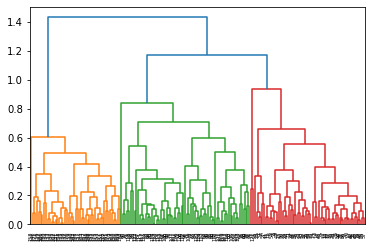

In [59]:
# create dendrogram using complete
dendrogram = sch.dendrogram(sch.linkage(df2, method='complete'))

In [60]:
# from above all three mothods it is evident that the data can be devided into three clusters 
# by cutting the longest line
# we use single linkage for our model 
# ecause the clustering density seems to be high 

In [61]:
# create clusters using eulidea affinity and single linkage  for three number of clusters

wine_hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [62]:
# predicting the clustering labels for the data
wine_hc_l = wine_hc.fit_predict(df2)

In [63]:
wine_hc_stored= wine_rack.copy()

In [64]:
# adding the predicted labels with original data labels

wine_hc_stored['label'] = wine_hc_l

In [66]:
wine_hc_stored.head()

#Type is the original lable, label is the predicted by model
# ignore the notation 

,pc1,pc2,pc3,Type,label
0,3.316751,-1.443463,-0.165739,1,2
1,2.209465,0.333393,-2.026457,1,2
2,2.516740,-1.031151,0.982819,1,2
3,3.757066,-2.756372,-0.176192,1,2
4,1.008908,-0.869831,2.026688,1,2


In [67]:
# grouping the elements to check any inter label association

wine_hc_stored_drum = wine_hc_stored.groupby(['Type','label']).agg(['mean']).reset_index()

In [68]:
wine_hc_stored_drum

,Type,label,pc1,pc2,pc3
,,,mean,mean,mean
0,1,2,2.282739,-0.967874,-0.159555
1,2,0,-0.038986,1.643483,0.261592
2,3,1,-2.748200,-1.241308,-0.190818


In [69]:
#as we can see from above there are no cross listing of type column and label column
#all the elements of a perticular type are within same cluster
# hence it is a good model